In [925]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
from plotly.graph_objs import *
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing,cross_validation
from matplotlib import style
import datetime
import math

In [926]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [927]:
## Fetching the data
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
params = [{'q':'AAL'}]
period = "5Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)
df.head()

,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
2013-12-09,23.85,25.44,23.4501,24.60,43197268
2013-12-10,24.50,25.17,24.4100,24.88,18660625
2013-12-11,25.48,27.20,25.3700,25.99,38843371
2013-12-12,26.20,26.71,25.4500,25.45,19981824
2013-12-13,25.75,26.30,25.5201,26.23,12192421


In [928]:
df.reset_index(level=None,inplace=True)
df=df.rename(index=str, columns={"index": "Date"})
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.reset_index()
df=df[500:]
df1=df.reset_index()
df1

,Date,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
0,2015-12-03,43.65,44.6000,42.9200,43.270,7235252
1,2015-12-04,43.82,44.9900,43.8200,44.970,9460935
2,2015-12-07,45.35,46.4900,45.2200,45.780,8911719
3,2015-12-08,45.10,45.5100,44.0700,44.550,9043652
4,2015-12-09,44.30,45.1900,43.1900,43.650,8001019
5,2015-12-10,43.79,44.4800,43.5400,44.090,7955619
6,2015-12-11,43.28,43.5869,42.0600,42.090,10235210
7,2015-12-14,42.26,42.8700,41.0800,41.770,10750523
8,2015-12-15,41.97,42.8200,41.9200,42.595,7097307
9,2015-12-16,42.99,43.4900,42.1200,43.200,7850944


In [929]:
daterange = pd.date_range('2018-04-25', '2018-07-30', freq='B')
newDate = pd.DataFrame(data=daterange, columns=['Date'])
newDate = newDate.dropna()
df2=newDate
df2

,Date
0,2018-04-25
1,2018-04-26
2,2018-04-27
3,2018-04-30
4,2018-05-01
5,2018-05-02
6,2018-05-03
7,2018-05-04
8,2018-05-07
9,2018-05-08


In [930]:
df3=df1.append(df2)
df3[['AAL_Close','AAL_High','AAL_Low','AAL_Open','AAL_Volume','Date']]
df4=df3[['Date','AAL_Close','AAL_High','AAL_Low','AAL_Open','AAL_Volume']]
df4

,Date,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume
0,2015-12-03,43.270,44.6000,42.9200,43.65,7235252.0
1,2015-12-04,44.970,44.9900,43.8200,43.82,9460935.0
2,2015-12-07,45.780,46.4900,45.2200,45.35,8911719.0
3,2015-12-08,44.550,45.5100,44.0700,45.10,9043652.0
4,2015-12-09,43.650,45.1900,43.1900,44.30,8001019.0
5,2015-12-10,44.090,44.4800,43.5400,43.79,7955619.0
6,2015-12-11,42.090,43.5869,42.0600,43.28,10235210.0
7,2015-12-14,41.770,42.8700,41.0800,42.26,10750523.0
8,2015-12-15,42.595,42.8200,41.9200,41.97,7097307.0
9,2015-12-16,43.200,43.4900,42.1200,42.99,7850944.0


In [931]:
forecast_col ='AAL_Close'
df4.fillna(-9999,inplace=True)
df4

,Date,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume
0,2015-12-03,43.270,44.6000,42.9200,43.65,7235252.0
1,2015-12-04,44.970,44.9900,43.8200,43.82,9460935.0
2,2015-12-07,45.780,46.4900,45.2200,45.35,8911719.0
3,2015-12-08,44.550,45.5100,44.0700,45.10,9043652.0
4,2015-12-09,43.650,45.1900,43.1900,44.30,8001019.0
5,2015-12-10,44.090,44.4800,43.5400,43.79,7955619.0
6,2015-12-11,42.090,43.5869,42.0600,43.28,10235210.0
7,2015-12-14,41.770,42.8700,41.0800,42.26,10750523.0
8,2015-12-15,42.595,42.8200,41.9200,41.97,7097307.0
9,2015-12-16,43.200,43.4900,42.1200,42.99,7850944.0


In [932]:
forecast_out = int(math.ceil(0.01*len(df1)))
forecast_out

7

In [933]:
df4['label']=df1[forecast_col].shift(-forecast_out)
df4

,Date,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,label
0,2015-12-03,43.270,44.6000,42.9200,43.65,7235252.0,41.770
1,2015-12-04,44.970,44.9900,43.8200,43.82,9460935.0,42.595
2,2015-12-07,45.780,46.4900,45.2200,45.35,8911719.0,43.200
3,2015-12-08,44.550,45.5100,44.0700,45.10,9043652.0,42.460
4,2015-12-09,43.650,45.1900,43.1900,44.30,8001019.0,41.090
5,2015-12-10,44.090,44.4800,43.5400,43.79,7955619.0,42.400
6,2015-12-11,42.090,43.5869,42.0600,43.28,10235210.0,42.895
7,2015-12-14,41.770,42.8700,41.0800,42.26,10750523.0,43.290
8,2015-12-15,42.595,42.8200,41.9200,41.97,7097307.0,43.810
9,2015-12-16,43.200,43.4900,42.1200,42.99,7850944.0,43.230


In [934]:
X = np.array(df4.drop(['AAL_Close','Date'],1))
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df4.dropna(inplace=True)
len(X)

663

In [935]:
Y = np.array(df4['label'])
len(Y)

663

In [936]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [937]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [938]:
forecast_set = clf.predict(X_lately)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [849]:
df4['Forecast'] = np.nan
df4.head()

,Date,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,Forecast
0,2015-12-03,43.27,44.60,42.92,43.65,7235252.0,NaN
1,2015-12-04,44.97,44.99,43.82,43.82,9460935.0,NaN
2,2015-12-07,45.78,46.49,45.22,45.35,8911719.0,NaN
3,2015-12-08,44.55,45.51,44.07,45.10,9043652.0,NaN
4,2015-12-09,43.65,45.19,43.19,44.30,8001019.0,NaN


In [851]:
from datetime import date
from datetime import datetime
last_date = df4.iloc[-1,-7]
last_date

Timestamp('2018-07-30 00:00:00')

In [855]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [856]:
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df4.loc[next_date] = [np.nan for _ in range(len(df4.columns)-1)]+[i]  

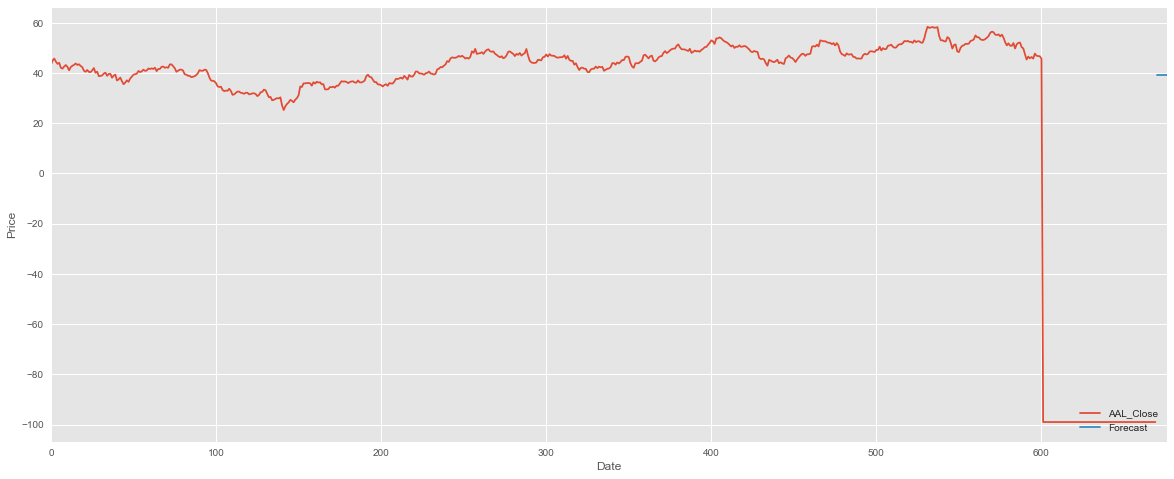

,Date,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,Forecast
0,2015-12-03,43.270,44.6000,42.9200,43.65,7235252.0,NaN
1,2015-12-04,44.970,44.9900,43.8200,43.82,9460935.0,NaN
2,2015-12-07,45.780,46.4900,45.2200,45.35,8911719.0,NaN
3,2015-12-08,44.550,45.5100,44.0700,45.10,9043652.0,NaN
4,2015-12-09,43.650,45.1900,43.1900,44.30,8001019.0,NaN
5,2015-12-10,44.090,44.4800,43.5400,43.79,7955619.0,NaN
6,2015-12-11,42.090,43.5869,42.0600,43.28,10235210.0,NaN
7,2015-12-14,41.770,42.8700,41.0800,42.26,10750523.0,NaN
8,2015-12-15,42.595,42.8200,41.9200,41.97,7097307.0,NaN
9,2015-12-16,43.200,43.4900,42.1200,42.99,7850944.0,NaN


In [857]:
plt.figure(figsize=(20,8))
df4['AAL_Close'].plot()
df4['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
df4